In [1]:
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show as rastershow

import numpy as np
import pandas as pd
import os
import glob

import geojson
import geopandas as gpd
import geoplot
import folium

from shapely.geometry import Point, Polygon

In [2]:
data_root = '/work/ka1176/shared_data/2024-ufz-deeptree/example_tiles/LVermGeo_DOP20/'

In [3]:
rastertif = rasterio.open(os.path.join(data_root, 'dop20rgbi_32_704_5708_2_st_2022.tif'))
arr = rastertif.read()

In [4]:
rastertif.crs

CRS.from_epsg(25832)

In [5]:
geoframe = gpd.read_file('/work/ka1176/shared_data/2024-ufz-deeptree/example_tiles/intersection.geojson')[['id', 'art_deu', 'art_botan', 'geometry']]
geoframe.head()

/home/k/k202141/.conda/envs/tree2/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 159 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,id,art_deu,art_botan,geometry
0,63,Spitz-Ahorn,Acer platanoides,"POLYGON ((705467.3 5709999.9, 705480.3 5709999..."
1,90,Winter-Linde,Tilia cordata,"POLYGON ((705352.7 5709999.9, 705361.7 5709999..."
2,96,Spitz-Ahorn,Acer platanoides,"POLYGON ((705441.3 5709999.9, 705449.9 5709999..."
3,105,Ginkgobaum,Ginkgo biloba L.,"POLYGON ((705209.1 5709999.9, 705233.5 5709999..."
4,107,Gemeine Esche,Fraxinus excelsior,"POLYGON ((705090.3 5709995.9, 705090.9 5709995..."


In [6]:
geoframe.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
gp = geoframe.explore()
folium.LayerControl().add_to(gp)
gp

<Axes: >

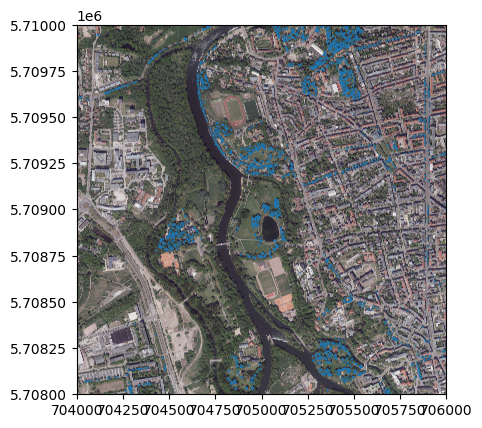

In [8]:
fig, ax = plt.subplots(1, 1)
rastershow(rastertif, ax=ax)
geoframe.plot(ax=ax)

In [9]:
geoframe['art_deu'].value_counts().head(10)

art_deu
Spitz-Ahorn             617
Winter-Linde            299
Gemeine Esche           275
Gemeine Rosskastanie    216
Berg-Ahorn              155
Stiel-Eiche             137
Stadt Linde             122
Rot-Eiche                75
Feld-Ahorn               48
Populus in Arten         45
Name: count, dtype: int64

In [10]:
ground_truth = gpd.read_file('/work/ka1176/shared_data/2024-ufz-deeptree/halle-baumkataster/itc005211130105323_point.shp')
ground_truth = ground_truth.to_crs(epsg=25832) # need this in the same coordinate system
ground_truth

,standort,hoehe_m,baum_nr,krone_m,stammu_cm,art_deu,gid,pflanzjahr,art_botan,strasse,geometry
0,None,2 - 5,000001,2 - 5,18.0,Kleinkronige Winterlinde,69872,2018.0,Tilia cordata 'Rancho',Max-Sauerlandt-Ring,POINT (702588.616 5710928.347)
1,None,None,000001,None,NaN,None,69850,NaN,None,None,POINT (702737.05 5708872.125)
2,Straße,2 - 5,000002,2 - 5,20.0,Winter-Linde,69874,2020.0,Tilia cordata,Max-Sauerlandt-Ring,POINT (702583.404 5710940.491)
3,None,2 - 5,000003,None,18.0,Kleinkronige Winterlinde,69875,2018.0,Tilia cordata 'Rancho',Max-Sauerlandt-Ring,POINT (702578.018 5710953.036)
4,None,2 - 5,000004,None,18.0,Kleinkronige Winterlinde,69876,2018.0,Tilia cordata 'Rancho',Max-Sauerlandt-Ring,POINT (702573.288 5710963.769)
...,...,...,...,...,...,...,...,...,...,...,...
40006,Nordfriedhof,6 - 10,R217,6 - 10,135.0,Spitz-Ahorn,76140,NaN,Acer platanoides,None,POINT (707271.33 5708737.649)
40007,Nordfriedhof,16 - 20,R218,6 - 10,151.0,Spitz-Ahorn,76141,NaN,Acer platanoides,None,POINT (707262.764 5708717.975)
40008,Nordfriedhof,11 - 15,R219,2 - 5,104.0,Gemeine Esche,76142,NaN,Fraxinus excelsior,None,POINT (707260.349 5708714.433)
40009,Nordfriedhof,11 - 15,R220,6 - 10,132.0,Gemeine Esche,76143,NaN,Fraxinus excelsior,None,POINT (707258.264 5708709.316)


<Axes: >

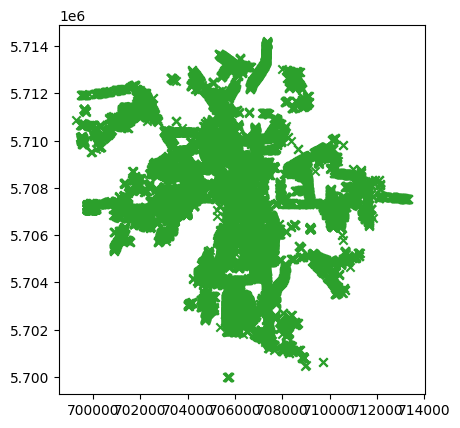

In [11]:
fig, ax = plt.subplots(1, 1)
#rastershow(rastertif, ax=ax)
ground_truth['geometry'].plot(ax=ax, color='C2', marker='x')

Restrict ground truth to the example tile

In [12]:
rastertif.bounds

BoundingBox(left=704000.0, bottom=5708000.0, right=706000.0, top=5710000.0)

In [13]:
box = Polygon( (Point(704000, 5708000), Point(704000, 5710000), Point(706000, 5710000), Point(706000, 5708000), ) )

In [14]:
%%time
sel = []
for point in ground_truth['geometry'].values:
    sel.append(point.within(box))

CPU times: user 356 ms, sys: 55.5 ms, total: 411 ms
Wall time: 355 ms


In [15]:
example_ground_truth = ground_truth[sel]
example_ground_truth

,standort,hoehe_m,baum_nr,krone_m,stammu_cm,art_deu,gid,pflanzjahr,art_botan,strasse,geometry
37,Peißnitzhaus,16 - 20,01,6 - 10,268.0,Gemeine Esche,73880,NaN,Fraxinus excelsior,Peißnitzinsel,POINT (704673.86 5708847.239)
39,Peißnitzhaus,16 - 20,02,6 - 10,125.0,Gemeine Esche,73882,NaN,Fraxinus excelsior,Peißnitzinsel,POINT (704673.554 5708849.265)
40,Peißnitzhaus,6 - 10,03,2 - 5,52.0,Gemeine Esche,73883,2001.0,Fraxinus excelsior,Peißnitzinsel,POINT (704659.323 5708851.86)
41,Peißnitzhaus,> 20,04,11 - 15,375.0,Stiel-Eiche,73884,NaN,Quercus robur,Peißnitzinsel,POINT (704649.47 5708861.784)
42,Peißnitzhaus,16 - 20,05,6 - 10,133.0,Winter-Linde,73885,NaN,Tilia cordata,Peißnitzinsel,POINT (704642.586 5708846.671)
...,...,...,...,...,...,...,...,...,...,...,...
39022,None,2 - 5,9h,2 - 5,40.0,Pyramideneiche,59993,1999.0,Quercus robur 'Fastigiata',Richard-Wagner-Straße,POINT (705628.657 5709443.075)
39376,None,11 - 15,ED07,2 - 5,87.0,Sonstige,33144,1810.0,Sonstige (bot. Gattung),Große Brunnenstraße,POINT (705241.762 5709608.463)
39377,Oberburg Giebichenstein,6 - 10,ED08,11 - 15,NaN,Sonstige,33147,1910.0,Sonstige (bot. Gattung),None,POINT (704989.398 5709940.938)
39378,Amtsgarten,16 - 20,ED10,6 - 10,335.0,Ginkgobaum,33151,1860.0,Ginkgo biloba L.,None,POINT (705165.251 5709951.654)


<Axes: >

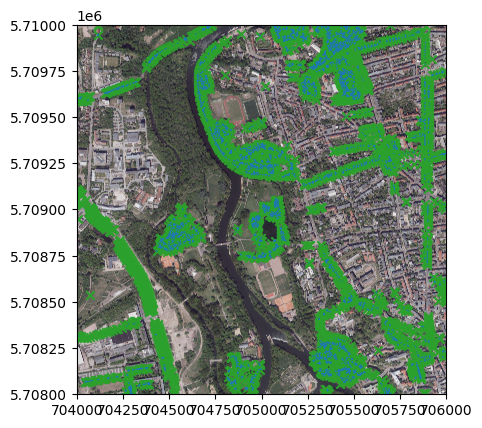

In [16]:
fig, ax = plt.subplots(1, 1)
rastershow(rastertif, ax=ax)
example_ground_truth['geometry'].plot(ax=ax, color='C2', marker='x')
geoframe.plot(ax=ax)